# Leukemia Multi-Class Classification Based on Gene Expression Levels

For this project, I will be analyzing a leukemia microarray dataset containing 64 samples of 22284 gene expression levels and the associated type of leukemia, which is the output. There are five different classes of Leukemia in the output column. The primary goal of this exercise is to fit different statistical learning models to this dataset in order to predict leukemia type based on gene expression levels. This dataset comes from the Curated Microarray Database
(CuMiDa), a repository containing 78 cancer microarray datasets that are curated for the purpose of testing various machine learning methods. 

Since the output in this dataset contains five different classes, another aspect of this project will be using various preprocessing methods to deal with multi-class classification. Specifically, we will examine one vs. rest, one-hot encoding, and label encoding methods. Different learning methods require different multi-class procceses, and we will examine a couple learning methods for each. 

Finally, for the last three models, we will be examining the importance each model gives to different genes to see which genes appear to be weighted more significantly than others. To do this, we will look at the top ten most significant genes for each model. At the end, we will be able to determine if a few genes play the largest role or if each model uses vastly different features. 

## Imports

In [14]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from itertools import chain
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

Reading in datafile from: https://sbcb.inf.ufrgs.br/cumida

## Setup

In [15]:
df = pd.read_csv('../data/Leukemia_GSE9476.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [16]:
df.shape

(64, 22285)

As we can see, there are 64 rows (samples) and 22285 columns (22284 gene expression levels and the leukemia type)

In [17]:
print('Number of Null Values:', sum(df.isnull().sum()))

Number of Null Values: 0


Asessing distributions of features:

In [18]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,7.819371,6.750455,7.475593,8.898925,4.513390,8.282604,5.544487,4.710160,6.679214,...,4.836931,6.612299,13.018089,12.864839,5.308956,4.584877,3.943064,3.637447,4.141114,4.116237
std,18.618987,0.169830,0.375415,1.308313,0.208462,0.096836,0.408621,0.140410,0.135293,1.583527,...,0.287327,0.315608,0.319913,0.316175,0.126512,0.107208,0.088848,0.070432,0.078673,0.107609
min,1.000000,7.278076,6.103252,6.296965,8.486306,4.351181,7.331400,5.295685,4.352735,4.543998,...,4.250235,5.746084,12.283312,12.170986,5.037287,4.401563,3.803410,3.517559,4.002604,3.910150
25%,16.750000,7.701161,6.503295,6.640182,8.765333,4.449243,8.015841,5.454499,4.623445,5.211335,...,4.622061,6.407176,12.796575,12.655307,5.231369,4.518736,3.883592,3.592435,4.095459,4.058131
50%,32.500000,7.814811,6.724425,6.794160,8.871007,4.509827,8.230027,5.547004,4.674101,6.532190,...,4.879685,6.596552,12.992452,12.827850,5.281801,4.572218,3.931645,3.635070,4.133191,4.103236
75%,48.250000,7.960393,6.929274,7.888134,9.023418,4.567569,8.515215,5.605790,4.789000,8.278395,...,5.060132,6.826579,13.248937,13.060069,5.392658,4.626728,3.992335,3.665841,4.176025,4.159044
max,64.000000,8.167701,7.962858,11.816433,9.458264,4.754915,9.595609,5.977147,5.193624,9.985429,...,5.457926,7.252390,13.863304,13.704673,5.732145,5.047613,4.188348,3.951433,4.403250,4.556003


Examining correlations of features:

In [19]:
df.corr()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,1.000000,-0.017390,-0.287458,0.039076,-0.191798,-0.165766,0.537481,-0.061006,-0.084213,-0.132612,...,-0.078098,-0.081497,0.110404,-0.012257,-0.003225,0.028186,0.059597,0.081975,0.057624,0.047899
1007_s_at,-0.017390,1.000000,-0.211397,0.048428,0.550651,0.532581,-0.187816,0.605351,0.341193,-0.252403,...,-0.080921,0.155385,0.222091,0.167597,0.289463,0.292311,0.439695,-0.057682,0.325661,0.143748
1053_at,-0.287458,-0.211397,1.000000,0.052046,-0.019107,-0.092464,0.004193,-0.211481,0.091480,-0.458993,...,-0.048166,-0.087241,-0.487970,-0.428705,-0.052843,0.200258,-0.078766,0.147081,-0.008098,-0.033567
117_at,0.039076,0.048428,0.052046,1.000000,-0.087912,0.139514,-0.156873,0.129338,0.022923,0.130044,...,-0.338409,-0.301180,0.060726,0.005112,0.026430,0.079387,0.145894,0.220985,0.296642,-0.154258
121_at,-0.191798,0.550651,-0.019107,-0.087912,1.000000,0.675123,-0.093813,0.597030,0.578764,-0.411777,...,-0.086058,-0.010736,0.339046,0.281559,0.161784,0.276980,0.345575,-0.070180,0.136449,0.201180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,0.028186,0.292311,0.200258,0.079387,0.276980,0.383448,-0.043508,0.287937,0.594468,-0.415536,...,0.078288,0.134404,-0.261536,-0.341361,0.691461,1.000000,0.561026,0.180404,0.537593,0.362899
AFFX-ThrX-M_at,0.059597,0.439695,-0.078766,0.145894,0.345575,0.491586,-0.024158,0.430617,0.399421,-0.196411,...,0.037651,0.090839,0.008528,-0.050219,0.586092,0.561026,1.000000,0.251967,0.555626,0.319536
AFFX-TrpnX-3_at,0.081975,-0.057682,0.147081,0.220985,-0.070180,0.091681,0.252945,0.090273,0.145922,-0.162103,...,-0.038817,0.107107,0.051583,0.025466,0.141822,0.180404,0.251967,1.000000,0.461286,0.281160
AFFX-TrpnX-5_at,0.057624,0.325661,-0.008098,0.296642,0.136449,0.373795,-0.066720,0.297473,0.279630,-0.138261,...,-0.032490,0.162587,-0.089035,-0.190515,0.518652,0.537593,0.555626,0.461286,1.000000,0.559344


There are no null values in the dataset, so we don't need to form any extensive preprocessing beyond dealing with the multi-class output.

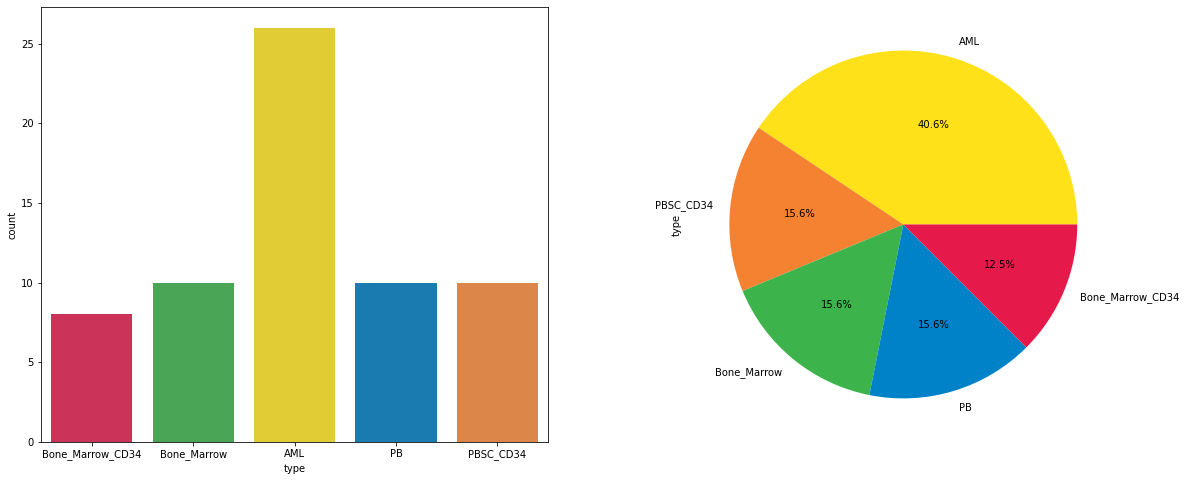

In [42]:
bar_colors = ['#e6194b','#3cb44b','#ffe119','#0082c8', '#f58231']
pie_colors = ['#ffe119','#f58231','#3cb44b','#0082c8', '#e6194b']

fig, ax = plt.subplots(1,2,figsize=(20,8))
_ = sns.countplot(x='type', data=df, palette=bar_colors, ax=ax[0])
_ = df['type'].value_counts().plot.pie(colors=pie_colors, autopct="%1.1f%%", ax=ax[1])

This highlights the distribution of leukemia type in the output column.

Now we need to separate our output from the features to train the various models.

In [21]:
x = df.drop(columns=['samples','type'], axis=1)
y = df['type']

We will be using test_train_split to create train sets to fit our models and test sets to assess prediction accuracy. As we have 64 samples, a test size of 0.25 will result in 48 samples in the train set and 16 samples in the test set. The random state of 42 is convention for reproducible results.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

## One vs. Rest Classification

One vs. Rest (OvR) classification is a method of multi-class classification, in which a separate binary classifier is trained for each class in the dataset. The binary classifier is trained to predict whether an example belongs to the target class or not, and the class with the highest predicted probability is selected as the final prediction. We will be looking at two models using OvR: logistic regression and support vector classification.

For linear models like logistic regression and support vector classifiers, it is generally recommended to standardize features.

In [23]:
# Standardizing features
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Before we begin, we will look at a dummy classifier, which is a baseline for accuracy (the accurracy one would achieve by guessing each time).

In [24]:
# Dummy classifier (expected baseline accuracy)
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(x_test)
dummy_score = dummy_clf.score(x_test, y_test)
print("The expected success rate from guessing is", str(dummy_score*100) + '%')

The expected success rate from guessing is 25.0%


### Logistic Regression

In [25]:
from sklearn.metrics import precision_recall_curve
model = LogisticRegression(max_iter=10000, multi_class='ovr')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
acc_score_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", str(acc_score_lr*100) + '%')

Logistic Regression Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 3            0                 0   0          1
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            0                 2   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of Logistic Regression: 93.75%


### Support Vector Classifier

In [26]:
svc = SVC()
model = OneVsRestClassifier(svc)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
acc_score_svc = accuracy_score(y_test, y_pred)
print("Support Vector Classifier Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of Support Vector Classifier:", str(acc_score_svc*100) + '%')

Support Vector Classifier Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 4            0                 0   0          0
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            0                 2   0          0
PB                  0            0                 0   3          0
PBSC_CD34           2            0                 0   0          1


Accuracy of Support Vector Classifier: 87.5%


## One-Hot Encoding

One-hot encoding is a method used to convert multi-class categorical data into a numerical representation that can be used by machine learning algorithms. In one-hot encoding, each category is represented by multiple columns, with a "1" in the column corresponding to the category and "0" in all other columns. We will be looking at two models using one-hot encoding: k-nearest neighbors and multinomial naive Bayes. Additionally, we will scale the data. It is not neccessary for these methods, but sometimes useful as they are sensitive to scale. In python, we can perform one-hot encoding with pd.get_dummies().

In [27]:
x = df.drop(columns=['samples','type'], axis=1)
y = pd.get_dummies(df['type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

original_labels = df['type'].astype('category').cat.categories # will be used for labels

The k value in k-nearest neighbors determines the number of clusters. One rule of thumb is to use square root of n. After testing different values, k=2 seems to work best.

### K-Nearest Neighbors

In [28]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
conf_matrix = pd.DataFrame(conf_matrix, index=original_labels, columns=original_labels)
acc_score_k = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of K-Nearest Neighbors:", str(acc_score_k*100) + '%')

K-Nearest Neighbors Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 3            0                 0   0          1
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            0                 2   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of K-Nearest Neighbors: 93.75%


We need to slightly adjust the output for multinomial naive bayes.

### Naive Bayes

In [29]:
y = where(y==1)[1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)


model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=original_labels, columns=original_labels)
acc_score_nb = accuracy_score(y_test, y_pred)
print("Naive Bayes Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of Naive Bayes:", str(acc_score_nb*100) + '%')

Naive Bayes Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 3            0                 0   0          1
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            0                 2   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of Naive Bayes: 93.75%


## Label Encoding

Label encoding is a method for converting categorical data, represented as a string or an integer, to a numerical representation that can be used by machine learning algorithms. This is achieved by assigning a unique integer to each category or class in the data, so that each category or class can be represented by a single integer value. We will try label encoding with three tree based methods.

Additionally, we will be examining the importance of each feature in these trees.

In [30]:
encoder = LabelEncoder()
x = df.drop(columns=['samples','type'], axis=1)
y = df['type']
y = encoder.fit_transform(df['type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

original_labels = df['type'].astype('category').cat.categories # will be used for labels

### Decision Tree

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=original_labels, columns=original_labels)
acc_score_dtc = accuracy_score(y_test, y_pred)
print("Decision Tree Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of Decision Tree:", str(acc_score_dtc*100) + '%')

Decision Tree Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 3            1                 0   0          0
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            1                 1   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of Decision Tree: 87.5%


In [32]:
sig_feats_dtc = [] #will hold significant features

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top Random Forest Features")

for f in range(10):
    if importances[indices[f]] > 0:
        print(x.columns[indices[f]])
        sig_feats_dtc.append(x.columns[indices[f]])

Top Random Forest Features
221268_s_at
207426_s_at
209281_s_at
201199_s_at
209527_at
214651_s_at


## Random Forest 

In [33]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=original_labels, columns=original_labels)
acc_score_rfc = accuracy_score(y_test, y_pred)
print("Random Forest Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of Random Forest:", str(acc_score_rfc*100) + '%')

Random Forest Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 4            0                 0   0          0
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    0            0                 2   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of Random Forest: 100.0%


In [34]:
sig_feats_rfc = [] #will hold significant features

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top Random Forest Features")

for f in range(10):
    if importances[indices[f]] > 0:
        print(x.columns[indices[f]])
        sig_feats_rfc.append(x.columns[indices[f]])

Top Random Forest Features
215054_at
221268_s_at
201030_x_at
210976_s_at
208352_x_at
208772_at
218667_at
206674_at
219188_s_at
221790_s_at


### XGBoost

In [35]:
model = XGBClassifier(use_label_encoder= False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=original_labels, columns=original_labels)
acc_score_xgb = accuracy_score(y_test, y_pred)
print("XGBoost Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Accuracy of XGBoost:", str(acc_score_xgb*100) + '%')

XGBoost Confusion Matrix:
                  AML  Bone_Marrow  Bone_Marrow_CD34  PB  PBSC_CD34
AML                 4            0                 0   0          0
Bone_Marrow         0            4                 0   0          0
Bone_Marrow_CD34    1            0                 1   0          0
PB                  0            0                 0   3          0
PBSC_CD34           0            0                 0   0          3


Accuracy of XGBoost: 93.75%


In [36]:
sig_feats_xgb = [] #will hold significant features

importances = model.get_booster().get_score(importance_type="gain")
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)
print("Top XGBoost Features")

for feature, importance in importances_sorted[:10]:
    print(feature)
    sig_feats_rfc.append(feature)

Top XGBoost Features
221268_s_at
201540_at
200006_at
202124_s_at
200618_at
203789_s_at
209983_s_at
209586_s_at
1431_at
215054_at


### Assessing Feature Importance in Tree-Based Models

In [37]:
sig_feats = sig_feats_dtc + sig_feats_rfc + sig_feats_xgb
pd.value_counts(sig_feats)

221268_s_at    3
215054_at      2
218667_at      1
206674_at      1
209983_s_at    1
209527_at      1
208772_at      1
200618_at      1
219188_s_at    1
1431_at        1
201199_s_at    1
209586_s_at    1
209281_s_at    1
208352_x_at    1
202124_s_at    1
200006_at      1
207426_s_at    1
201540_at      1
210976_s_at    1
203789_s_at    1
201030_x_at    1
214651_s_at    1
221790_s_at    1
dtype: int64

As we can see, the gene expression levels of 221268_s_at are weighted in multiple trees. This indicates that this feature is more predictive of leukemia type than other features in the dataset for tree-based methods.

## Comparing Prediction Accuracies

In [38]:
# Creating Dataframe of Model Accuracies
acc = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Classifier','K-Nearest Neighbors','Naive Bayes','Decision Tree','Random Forest','XGBoost'],
                         'Accuracy': [acc_score_lr*100, acc_score_svc*100, acc_score_k*100,acc_score_nb*100, acc_score_dtc*100, acc_score_rfc*100, acc_score_xgb*100]})
acc

,Model,Accuracy
0,Logistic Regression,93.75
1,Support Vector Classifier,87.50
2,K-Nearest Neighbors,93.75
3,Naive Bayes,93.75
4,Decision Tree,87.50
5,Random Forest,100.00
6,XGBoost,93.75


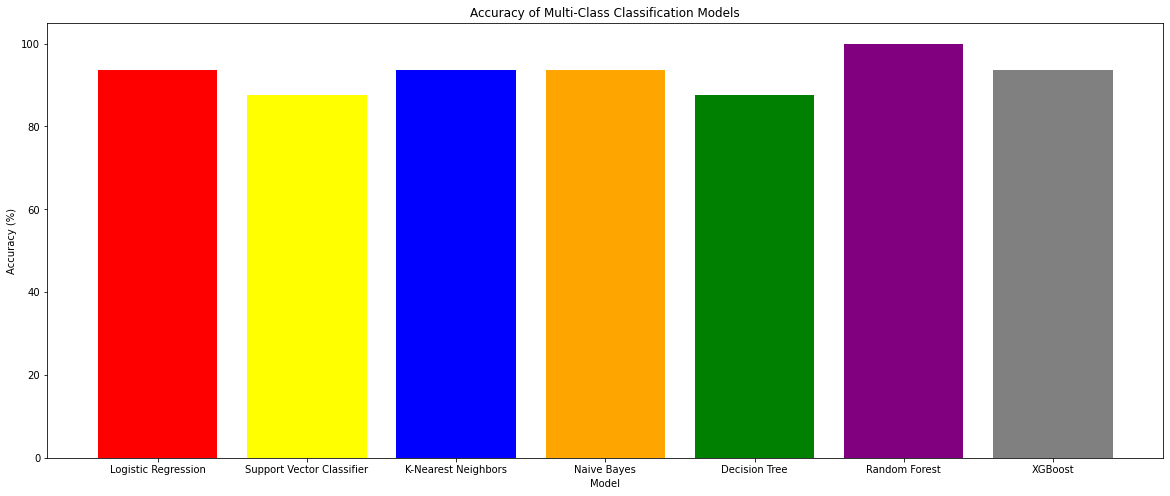

In [39]:
plt.figure(figsize=(20,8))

colors = ['red','yellow','blue','orange','green','purple','grey',]
plt.title("Accuracy of Multi-Class Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.bar(acc['Model'], acc['Accuracy'],color = colors)
plt.show()